In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
from SVMsources.svm_source import frontiere, rand_gauss, rand_bi_gauss, plot_2d
from sklearn import svm
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.model_selection import train_test_split



Score : 1.0


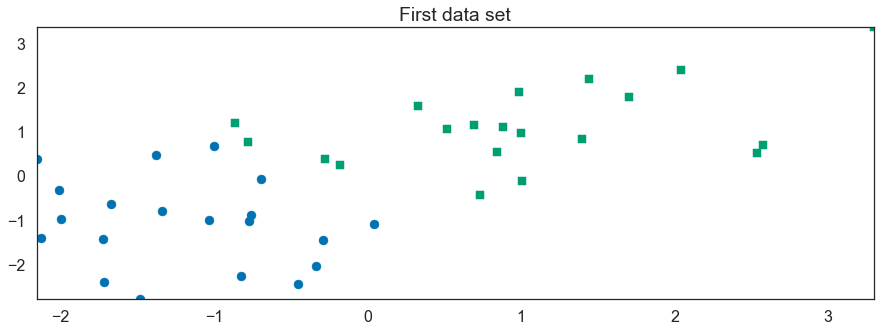

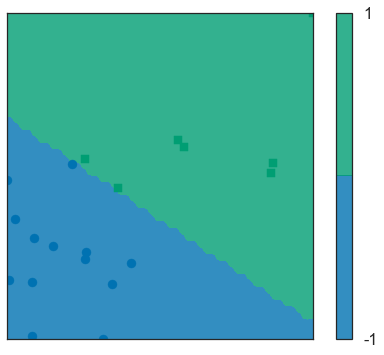

In [8]:
plt.close('all')
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Computer Modern Roman']})
params = {'axes.labelsize': 12,
          'font.size': 16,
          'legend.fontsize': 16,
          'text.usetex': False,
          'figure.figsize': (8, 6)}
plt.rcParams.update(params)

sns.set_context("poster")
sns.set_palette("colorblind")
sns.set_style("white")
sns.axes_style()

###############################################################################
#               Toy dataset : 2 gaussians
###############################################################################

n1 = 20
n2 = 20
mu1 = [1., 1.]
mu2 = [-1., -1.]
sigma1 = [0.9, 0.9]
sigma2 = [0.9, 0.9]
X1, y1 = rand_bi_gauss(n1, n2, mu1, mu2, sigma1, sigma2)

plt.show()
plt.close("all")
plt.ion()
plt.figure(1, figsize=(15, 5))
plt.title('First data set')
plot_2d(X1, y1)

X_train = X1[::2]
Y_train = y1[::2].astype(int)
X_test = X1[1::2]
Y_test = y1[1::2].astype(int)

# fit the model with linear kernel
clf = SVC(kernel='linear')
clf.fit(X_train, Y_train)

# predict labels for the test data base
y_pred = clf.predict(X_test)

# check your score
score = clf.score(X_test, Y_test)
print('Score : %s' % score)
# display the frontiere


def f(xx):
    """Classifier: needed to avoid warning due to shape issues"""
    return clf.predict(xx.reshape(1, -1))

plt.figure(2)
frontiere(f, X_train, Y_train, w=None, step=50, alpha_choice=1)




Score : 0.74


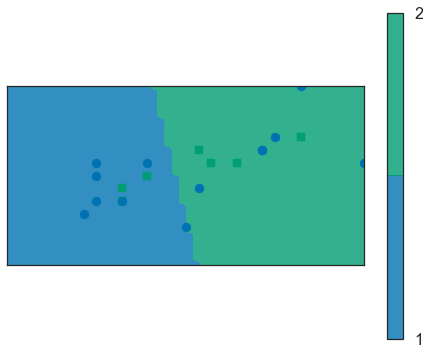

In [9]:
###############################################################################
#               Iris Dataset
###############################################################################

iris = datasets.load_iris()
X = iris.data
y = iris.target
X = X[y != 0, :2]
y = y[y != 0]

# TODO : split train test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=26)


# fit the model

clf.fit(X_train, y_train)

# predict labels

clf.predict(X_test)

# check your score
score = clf.score(X_test, y_test)
print('Score : %s' % score)

# display your results using plot_2d and frontiere

plt.figure(2)
frontiere(f, X_train, Y_train, w=None, step=50, alpha_choice=1)

Score : 0.72


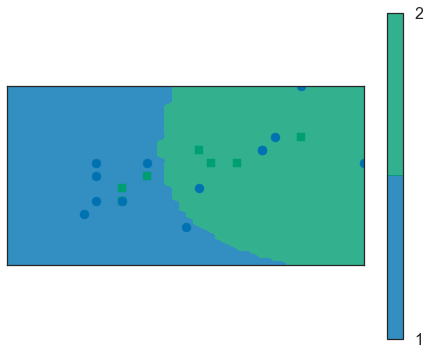

In [12]:
# fit the model

clf = SVC(kernel='poly')
clf.fit(X_train, y_train)

# predict labels

clf.predict(X_test)

# check your score
score = clf.score(X_test, y_test)
print('Score : %s' % score)

# display your results using plot_2d and frontiere

plt.figure(2)
frontiere(f, X_train, Y_train, w=None, step=50, alpha_choice=1)

In [13]:
###############################################################################
#               SVM GUI
###############################################################################

# please open a terminal and run python2 svm_gui.py
# Then, play with the applet : generate various datasets and observe the
# different classifiers you can obtain by varying the kernel

###############################################################################
#               Face Recognition Task
###############################################################################
"""
The dataset used in this example is a preprocessed excerpt
of the "Labeled Faces in the Wild", aka LFW_:

  http://vis-www.cs.umass.edu/lfw/lfw-funneled.tgz (233MB)

  _LFW: http://vis-www.cs.umass.edu/lfw/

"""

from time import time
import pylab as pl

from sklearn.cross_validation import train_test_split
from sklearn.datasets import fetch_lfw_people


####################################################################
# Download the data (if not already on disk); load it as numpy arrays
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4,
                              color=True, funneled=False, slice_=None,
                              download_if_missing=True)
# data_home='.'

# introspect the images arrays to find the shapes (for plotting)
images = lfw_people.images / 255.
n_samples, h, w, n_colors = images.shape

# the label to predict is the id of the person
target_names = lfw_people.target_names.tolist()

####################################################################
# Pick a pair to classify such as
names = ['Tony Blair', 'Colin Powell']
# names = ['Donald Rumsfeld', 'Colin Powell']

idx0 = (lfw_people.target == target_names.index(names[0]))
idx1 = (lfw_people.target == target_names.index(names[1]))
images = np.r_[images[idx0], images[idx1]]
n_samples = images.shape[0]
y = np.r_[np.zeros(np.sum(idx0)), np.ones(np.sum(idx1))].astype(np.int)

####################################################################
# Extract features

# features using only illuminations
X = (np.mean(images, axis=3)).reshape(n_samples, -1)

# # or compute features using colors (3 times more features)
# X = images.copy().reshape(n_samples, -1)

# Scale features
X -= np.mean(X, axis=0)
X /= np.std(X, axis=0)

####################################################################
# Split data into a half training and half test set
# X_train, X_test, y_train, y_test, images_train, images_test = \
#    train_test_split(X, y, images, test_size=0.5, random_state=0)
# X_train, X_test, y_train, y_test = \
#    train_test_split(X, y, test_size=0.5, random_state=0)

indices = np.random.permutation(X.shape[0])
train_idx, test_idx = indices[:X.shape[0] // 2], indices[X.shape[0] // 2:]
X_train, X_test = X[train_idx, :], X[test_idx, :]
y_train, y_test = y[train_idx], y[test_idx]
images_train, images_test = images[
    train_idx, :, :, :], images[test_idx, :, :, :]



In [39]:
####################################################################
# Quantitative evaluation of the model quality on the test set
print ('Fitting the classifier to the training set')
from sklearn.model_selection import GridSearchCV
t0 = time()

X_train.shape

#TODO : fit a classifier, 

C = np.logspace(start=-5, stop=5, num=25)

parameters = {'kernel':['linear'], 'C':C}
svc = SVC()
clf = GridSearchCV(svc, parameters,n_jobs=-1, verbose=1, cv=5)
clf.fit(X_train, y_train)

print('score',clf.best_score_)
print('parameters', clf.best_params_)
score = clf.cv_results_['mean_test_score']






Fitting the classifier to the training set
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   27.6s finished


score 0.931578947368
parameters {'C': 0.001211527658628589, 'kernel': 'linear'}


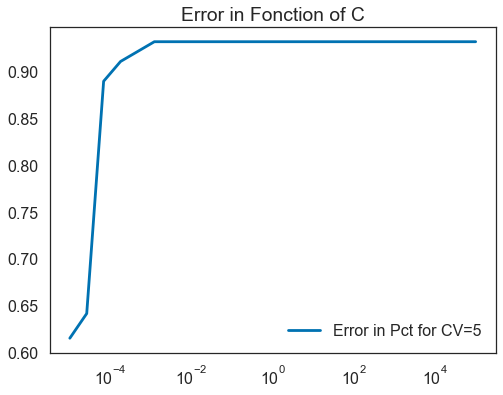

In [40]:
plt.semilogx(C,score, label='Error in Pct for CV=5')
plt.title('Error in Fonction of C')
plt.legend()
plt.show()

In [41]:
print(clf.best_estimator_)

SVC(C=0.001211527658628589, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


Predicting the people names on the testing set
done in 0.285s
Chance level : 0.621052631579
Accuracy : 0.884210526316


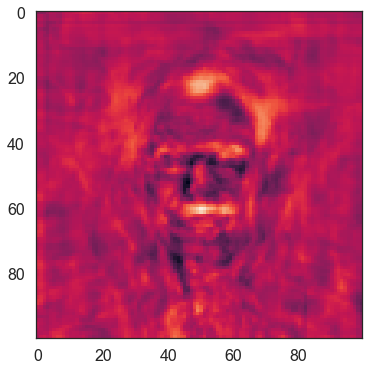

In [42]:
print("Predicting the people names on the testing set")
t0 = time()
clf.predict(X_test)

print ("done in %0.3fs" % (time() - t0))
print ("Chance level : %s" % max(np.mean(y), 1. - np.mean(y)))
print ("Accuracy : %s" % clf.score(X_test, y_test))


####################################################################
# Look at the coefficients
pl.figure()
pl.imshow(np.reshape(clf.best_estimator_.coef_, (h, w)))





In [27]:
####################################################################
# Qualitative evaluation of the predictions using matplotlib


def plot_gallery(images, titles, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    pl.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    pl.subplots_adjust(bottom=0, left=.01, right=.99, top=.90,
                       hspace=.35)
    for i in range(n_row * n_col):
        pl.subplot(n_row, n_col, i + 1)
        pl.imshow(images[i])
        pl.title(titles[i], size=12)
        pl.xticks(())
        pl.yticks(())


def title(y_pred, y_test, names):
    pred_name = names[int(y_pred)].rsplit(' ', 1)[-1]
    true_name = names[int(y_test)].rsplit(' ', 1)[-1]
    return ('predicted: %s\ntrue:      %s' % (pred_name, true_name))

prediction_titles = [title(y_pred[i], y_test[i], names)
                     for i in range(y_pred.shape[0])]

plot_gallery(images_test, prediction_titles)
pl.show()

#QUETSION 8 : TODO : try reducing the dimension using sklearn.decomposition.RandomizedPCA and compute again an SVM classifer.
